#**MACHINE LEARNING PART** with the data collected

**PARTICIPANTS:**

Gracia Estrán Buyo

Annunziata Álvarez-Cascos Hervías

Beltran Valero Castellano

Marta Almagro Fuello

## **INITIALIZATION**

In [ ]:
# Import necessary libraries:

from google.colab import drive
import pandas as pd # Dataframes' management
import numpy as np # Arrays' management
import matplotlib.pyplot as plt # Plots
import seaborn as sns # Plots


from sklearn.model_selection import train_test_split # Creation of train and test sets
from sklearn.utils import resample # Oversampling
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder # Data preprocessing and feature scaling (Standarization)
from sklearn.compose import ColumnTransformer # Apply different preprocessing steps

from sklearn.pipeline import Pipeline # ML Pipeline
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning
from sklearn.linear_model import LogisticRegression # Analysis Model
from sklearn.ensemble import RandomForestClassifier # Analysis Model
from sklearn.svm import SVC # Analysis Model
from xgboost import XGBClassifier  # Analysis Model
from sklearn.neural_network import MLPClassifier # Analysis Model
from sklearn.neighbors import KNeighborsClassifier # Analysis Model

# ADDITIONAL MODELS
from sklearn.ensemble import GradientBoostingClassifier # Analysis Model
from sklearn.ensemble import AdaBoostClassifier # Analysis Model
from sklearn.ensemble import ExtraTreesClassifier # Analysis Model
from sklearn.ensemble import BaggingClassifier # Analysis Model
from sklearn.tree import DecisionTreeClassifier # Analysis Model
from sklearn.naive_bayes import GaussianNB # Analysis Model
from sklearn.linear_model import SGDClassifier # Analysis Model
from sklearn.linear_model import PassiveAggressiveClassifier # Analysis Model
from sklearn.ensemble import VotingClassifier # Analysis Model
from sklearn.ensemble import StackingClassifier # Analysis Model
from sklearn.ensemble import HistGradientBoostingClassifier # Analysis Model
from sklearn.ensemble import IsolationForest # Analysis Model


from sklearn.metrics import accuracy_score # Performance Measures
from sklearn.exceptions import ConvergenceWarning # Manage warnings
import warnings # Manage warnings


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We are going to carry out an analysis of the dataset extracted with more than 15000 songs. Before starting we must take into account where does the data.
The dataset has the following variables:

- Category: This column likely categorizes the songs into different genres, moods, or styles. It serves as a label or tag to classify songs into specific groups.
- Track_ID: A unique identifier for each track. It distinguishes one song from another in the dataset.
-	Track: The name or title of the song. It represents the human-readable identifier for the track.
- danceability: A measure of how suitable a track is for dancing. It typically ranges from 0 to 1, where higher values indicate tracks that are easier to dance to.
- energy:	Represents the intensity and activity of a song. Higher energy values suggest more dynamic and fast-paced songs.
- key: The key in which the song is written. It denotes the tonic note or pitch around which the other notes in the song revolve.
- loudness:The overall volume of the song. It is usually measured in decibels (dB) and represents the perceived loudness to the human ear.
- mode:	Indicates whether the song is in a major or minor key. It can be binary, with 0 representing minor and 1 representing major.
- speechiness: Describes the presence of spoken words in the song as opposed to music. A higher value indicates a greater presence of spoken words.
-	acousticness: Measures the acoustic quality of a song. It ranges from 0 to 1, where 1 indicates a completely acoustic track.
- instrumentalness: Indicates whether a track is instrumental (no vocals). Higher values suggest a higher likelihood that the track is instrumental.
- liveness:	Reflects the presence of an audience in the recording. A higher value may suggest that the track was recorded live.
- valence: Represents the musical positiveness of a track. Higher valence values indicate a more positive and happy mood.
- tempo: The speed or pace of a song, usually measured in beats per minute (BPM). It denotes how fast or slow the song is.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/WEB ANALYTICS FINAL PROJECT/df_sin_outliers.csv')
df.head()

,Category,Track_ID,Track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Afro,04caQq1IeChrnBnvch1FQf,Lonely At The Top - Remix,0.718,0.749,6.0,-7.349,0.0,0.0587,0.7870,0.000258,0.1820,0.908,105.086
1,Afro,4CljUDO1I5hpKjwSNK6RWY,Water - Remix,0.739,0.749,6.0,-3.318,1.0,0.0746,0.1200,0.000000,0.1490,0.505,117.030
2,Afro,4xy8o1WzpHwEEg0IOiU7rJ,soso (with Ozuna),0.739,0.669,3.0,-7.557,0.0,0.1190,0.4260,0.004740,0.1100,0.609,104.971
3,Afro,7knLcYCOSaURD0d7HUULFM,COMO UN BEBÉ,0.825,0.807,6.0,-5.753,1.0,0.0949,0.0732,0.000005,0.1380,0.816,103.053
4,Afro,1rrqJ9QkOBYJlsZgqqwxgB,Rush,0.792,0.503,1.0,-8.044,1.0,0.0626,0.0369,0.000570,0.0959,0.381,99.970


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (replace with mean for numeric columns)
df.fillna(df.mean(), inplace=True)

# Remove duplicates THERE ARE NONE
#df.drop_duplicates(inplace=True) # (15867, 14)

df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype(bool)

Category            0
Track_ID            0
Track               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64


<ipython-input-4-e86ddd86f738>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


## **STANDARIZATION**

In [ ]:
# Standardize numerical columns
scaler = StandardScaler()
df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = scaler.fit_transform(df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])


In [ ]:
# Data exploration
print(df.describe())

       danceability        energy      loudness   speechiness  acousticness  \
count  9.835000e+03  9.835000e+03  9.835000e+03  9.835000e+03  9.835000e+03   
mean   2.311883e-17 -4.623766e-17 -1.849506e-16 -6.935648e-17  2.311883e-17   
std    1.000051e+00  1.000051e+00  1.000051e+00  1.000051e+00  1.000051e+00   
min   -3.479142e+00 -2.688010e+00 -7.135548e+00 -8.085619e-01 -9.441768e-01   
25%   -6.579101e-01 -6.259516e-01 -2.863802e-01 -5.972533e-01 -8.387696e-01   
50%    8.652007e-02  1.033327e-01  2.189846e-01 -3.843678e-01 -4.220215e-01   
75%    7.454200e-01  7.699791e-01  5.923737e-01  1.533653e-01  6.418773e-01   
max    2.316643e+00  1.776660e+00  1.975820e+00  7.322088e+00  2.306259e+00   

       instrumentalness      liveness       valence         tempo  
count      9.835000e+03  9.835000e+03  9.835000e+03  9.835000e+03  
mean       2.311883e-17 -6.357678e-17 -4.623766e-17  2.398578e-16  
std        1.000051e+00  1.000051e+00  1.000051e+00  1.000051e+00  
min       -2.945

## **OVERSAMPLING**
Increase the number of instances in the minority class to balance the class distribution.

In [ ]:
# Assuming 'Category' is the target variable
# Identify the class with the minimum instances
minority_class = df['Category'].value_counts().idxmin()

# Separate majority and minority classes
df_majority = df[df['Category'] != minority_class]
df_minority = df[df['Category'] == minority_class]

# Oversample the minority class to match the number of instances in the majority class
df_minority_oversampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Combine the oversampled minority class with the majority class
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

# Shuffle the dataset
df_oversampled = df_oversampled.sample(frac=1, random_state=42)


## **ALL MODELS COMPARISON**

Logistic Regression Accuracy: 55.07%
Random Forest Accuracy: 60.53%
SVM Accuracy: 58.62%
XGBoost Accuracy: 60.04%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 58.36%
KNN Accuracy: 56.91%


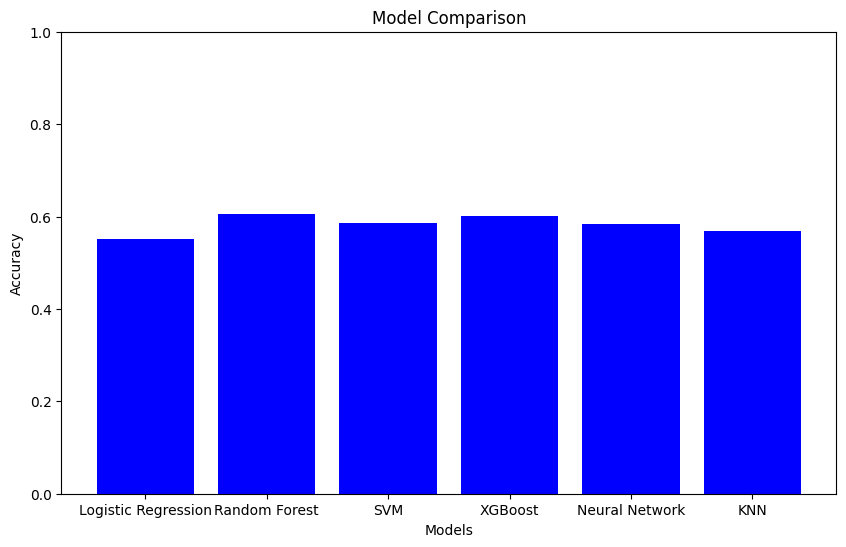

In [ ]:
# Suppress ConvergenceWarning
#warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Assuming 'Category' is the target variable
X = df_oversampled.drop(['Category', 'Track_ID', 'Track'], axis=1)
y = df_oversampled['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_columns = ['key', 'mode']

# Create a column transformer to handle numerical and categorical features separately
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['float64']).columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(),
    'Neural Network': MLPClassifier(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
accuracies = []
for model_name, model in models.items():
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Encode target variable if needed
    if model_name != 'Logistic Regression':
        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train)
        y_test_encoded = le.transform(y_test)
    else:
        y_train_encoded = y_train
        y_test_encoded = y_test

    # Train the model
    pipeline.fit(X_train, y_train_encoded)

    # Predict on the testing data
    y_pred = pipeline.predict(X_test)

    # Evaluate the model and store the accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred)
    accuracies.append(accuracy)

    # Print the accuracy for each model
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim([0, 1])
plt.show()

## **ALL MODELS COMPARISON**

In [ ]:
# Additional models

# Neural Network using Keras
from keras.models import Sequential
from keras.layers import Dense

# Assuming 'Category' is the target variable
X = df_oversampled.drop(['Category', 'Track_ID', 'Track'], axis=1)
y = df_oversampled['Category']

# Use LabelEncoder to convert string class labels to numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(),
    'Neural Network': MLPClassifier(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'SGD Classifier': SGDClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'Voting Classifier': VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('svm', SVC()), ('xgb', XGBClassifier()), ('nn', MLPClassifier()), ('knn', KNeighborsClassifier())], voting='hard'),
    'Stacking Classifier': StackingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('svm', SVC()), ('xgb', XGBClassifier()), ('nn', MLPClassifier()), ('knn', KNeighborsClassifier())], final_estimator=LogisticRegression()),
    'Hist Gradient Boosting': HistGradientBoostingClassifier(),
    'Isolation Forest': IsolationForest()
}

# Train and evaluate each model
accuracies = []
for model_name, model in models.items():
    if model_name == 'Neural Network':

        # Neural Network using Keras
        model_nn = Sequential()
        model_nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
        model_nn.add(Dense(32, activation='relu'))
        model_nn.add(Dense(len(np.unique(y_train)), activation='softmax'))  # The output layer based on the number of unique classes
        model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model_nn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

        # Predict using the model
        y_pred_probs = model_nn.predict(X_test)
        y_pred = np.argmax(y_pred_probs, axis=1)

    else:
        # Regular models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Evaluate the model and store the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Print the accuracy for each model
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")

# Plot the accuracies
plt.figure(figsize=(12, 6))
plt.bar(models.keys(), accuracies, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim([0, 1])
plt.xticks(rotation=45, ha='right')
plt.show()


### RANDOM FOREST: Hyperparameter tuning

In [ ]:
# Assuming 'Category' is the target variable
X = df_oversampled.drop(['Category', 'Track_ID', 'Track'], axis=1)
y = df_oversampled['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_columns = ['key', 'mode']

# Create a column transformer to handle numerical and categorical features separately
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['float64']).columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Create a pipeline with the preprocessor and the Random Forest model
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

# Define the hyperparameter grid
param_grid = {
    'model__n_estimators': [100, 300, 500],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [3, 7, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest model with the best hyperparameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf * 100)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 500}
Random Forest Accuracy: 60.76604554865425


## **Correlation between features**

In [ ]:
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation between features")
plt.show()

We first take a look at the correlation between the features to get some possible insights. We can confirm some inicial hypothesis we had about music, but we also found some surpirses:

Energy is highly positive correlated with loudness, highly negative correlated with acousticness, some positive correlation with liveness, valence and tempo and some negative correlation with instrumentalness.
Acousticness has some positive correlation with instrumentalness.
Instrumentalness has high negative correlation with loudness
Valence has its highest positive correlation with danceability, then with energy and then with loudness.
Tempo, liveness, speechness, mode and key don't have much relationship with any variable.